**Youtube Revenue Prediction**


> by: Noordeep Kaur (102017145) and Ankita Sharma (102017120)





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from IPython.display import display
%matplotlib inline
plt.style.use('ggplot')

## **Import Data**

In [6]:
#import 2018data
from google.colab import files
uploaded1 = files.upload()

Saving Table data 2018.csv to Table data 2018.csv


In [7]:
#import 2019data
from google.colab import files
uploaded2 = files.upload()

Saving Table data 2019.csv to Table data 2019.csv


In [8]:
#import 2020data
from google.colab import files
uploaded3 = files.upload()

Saving Table data 2020.csv to Table data 2020.csv


In [4]:
df = pd.concat((pd.read_csv("Table data 2018.csv")[1:-1], 
                pd.read_csv("Table data 2019.csv")[1:-1],
               pd.read_csv("Table data 2020.csv")[1:-1])).reset_index(drop=True)

In [5]:
df

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,100.00,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.000
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,100.00,0.0,2.0,6.0,4.0,44.58,NaN,NaN,4.0,37.0,0.9575,0:01:33,0.000
2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,100.00,0.0,0.0,2.0,5.0,38.75,NaN,NaN,2.0,26.0,0.5849,0:01:20,0.000
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,24.81,NaN,NaN,0.0,8.0,0.1152,0:00:51,0.000
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,45.50,NaN,NaN,1.0,17.0,0.4491,0:01:35,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,2021-09-22,2.2721,105872.0,4.04,4376635.0,546.0,399.0,98.19,195.0,972.0,2781.0,10594.0,25.75,0.0,0.0,1809.0,240554.0,19512.3516,0:04:52,126.600
1128,2021-09-23,1.8941,215712.0,5.83,4854638.0,2741.0,764.0,99.10,312.0,1221.0,2953.0,34422.0,30.35,1.0,4.0,1732.0,408582.0,19855.7704,0:02:54,163.558
1129,2021-09-24,2.1319,305881.0,6.08,7768271.0,4741.0,1055.0,99.09,521.0,1520.0,4804.0,56677.0,47.81,1.0,0.0,3284.0,652105.0,54463.2654,0:05:00,397.066
1130,2021-09-25,2.3468,152920.0,4.51,5788014.0,671.0,633.0,98.53,276.0,1112.0,3555.0,18458.0,41.24,0.0,0.0,2443.0,358868.0,26757.4077,0:04:28,178.664


In [6]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Date', 'Av­er­age_views_per_view­er', 'Unique_view­ers',
       'Im­pres­sions_click-through_rate_(%)', 'Im­pres­sions',
       'Com­ments_ad­ded', 'Shares', 'Likes_(vs._dis­likes)_(%)', 'Dis­likes',
       'Sub­scribers_lost', 'Sub­scribers_gained', 'Likes',
       'Av­er­age_per­cent­age_viewed_(%)', 'Videos_pub­lished',
       'Videos_ad­ded', 'Sub­scribers', 'Views', 'Watch_time_(hours)',
       'Av­er­age_view_dur­a­tion', 'Your_es­tim­ated_rev­en­ue_(USD)'],
      dtype='object')

In [7]:
col_map ={'Av­er­age_views_per_view­er':'Average_views_per_viewer',
          'Unique_view­ers':'Unique_viewers',
          'Av­er­age_per­cent­age_viewed_(%)':'Average_viewed',
          'Im­pres­sions':'Impressions',
          'Dis\xadlikes':'Dislikes',
          'Sub­scribers_lost':'Subscribers_lost',
          'Sub­scribers_gained':'Subscribers_gained',
          'Videos_pub­lished':'Videos_added',
          'Videos_ad­ded':'Videos_published', 
          'Sub­scribers':'Subscribers',
          'Im­pres­sions_click-through_rate_(%)':'Click_rate',
          'Com­ments_ad­ded':'Comments',
          'Watch_time_(hours)':'Watch_hours',
          'Av­er­age_view_dur­a­tion':'Average_view_sec',
          'Your_es­tim­ated_rev­en­ue_(USD)':'Revenue'}

In [8]:
df = df.rename(columns=col_map)

In [9]:
df = df.drop(['Likes_(vs._dis­likes)_(%)', 
              'Videos_added', 
              'Subscribers_lost',
              'Subscribers_gained','Comments',], axis=1)

In [10]:
print('Data Size: ', df.shape)

Data Size:  (1132, 15)


In [11]:
print('Null Values: ', df.isna().sum().sum())
print('Data types: ', df.dtypes.reset_index().groupby(0).count().reset_index().values.tolist())
df.head(5)

Null Values:  141
Data types:  [[dtype('float64'), 13], [dtype('O'), 2]]


,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,0:01:51,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,0.0,0.0,4.0,44.58,NaN,4.0,37.0,0.9575,0:01:33,0.0
2,2018-08-23,1.3684,19.0,20.65,92.0,0.0,0.0,5.0,38.75,NaN,2.0,26.0,0.5849,0:01:20,0.0
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,0.0,24.81,NaN,0.0,8.0,0.1152,0:00:51,0.0
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,0.0,45.50,NaN,1.0,17.0,0.4491,0:01:35,0.0


## **EDA**

In [12]:
df.select_dtypes(include=['object']).head(2)


,Date,Average_view_sec
0,2018-08-21,0:01:51
1,2018-08-22,0:01:33


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Average_view_sec'] = pd.to_timedelta(df['Average_view_sec']).dt.seconds


In [14]:
df

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.000
1,2018-08-22,1.1935,31.0,23.14,121.0,0.0,0.0,4.0,44.58,NaN,4.0,37.0,0.9575,93,0.000
2,2018-08-23,1.3684,19.0,20.65,92.0,0.0,0.0,5.0,38.75,NaN,2.0,26.0,0.5849,80,0.000
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,0.0,24.81,NaN,0.0,8.0,0.1152,51,0.000
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,0.0,45.50,NaN,1.0,17.0,0.4491,95,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,2021-09-22,2.2721,105872.0,4.04,4376635.0,399.0,195.0,10594.0,25.75,0.0,1809.0,240554.0,19512.3516,292,126.600
1128,2021-09-23,1.8941,215712.0,5.83,4854638.0,764.0,312.0,34422.0,30.35,4.0,1732.0,408582.0,19855.7704,174,163.558
1129,2021-09-24,2.1319,305881.0,6.08,7768271.0,1055.0,521.0,56677.0,47.81,0.0,3284.0,652105.0,54463.2654,300,397.066
1130,2021-09-25,2.3468,152920.0,4.51,5788014.0,633.0,276.0,18458.0,41.24,0.0,2443.0,358868.0,26757.4077,268,178.664


In [15]:
df.dtypes

Date                        datetime64[ns]
Average_views_per_viewer           float64
Unique_viewers                     float64
Click_rate                         float64
Impressions                        float64
Shares                             float64
Dislikes                           float64
Likes                              float64
Average_viewed                     float64
Videos_published                   float64
Subscribers                        float64
Views                              float64
Watch_hours                        float64
Average_view_sec                     int64
Revenue                            float64
dtype: object

In [16]:
df.isna().sum().reset_index().style.highlight_min()


,index,0
0,Date,0
1,Average_views_per_viewer,0
2,Unique_viewers,0
3,Click_rate,0
4,Impressions,0
5,Shares,0
6,Dislikes,0
7,Likes,0
8,Average_viewed,0
9,Videos_published,141


In [17]:
df.Videos_published.value_counts(dropna=False)

0.0    854
NaN    141
1.0    113
2.0     17
3.0      4
4.0      3
Name: Videos_published, dtype: int64

In [18]:
df.Videos_published = df.Videos_published.fillna(0.0, axis=0)
df.isna().sum().sum()

0

In [19]:
df.columns

Index(['Date', 'Average_views_per_viewer', 'Unique_viewers', 'Click_rate',
       'Impressions', 'Shares', 'Dislikes', 'Likes', 'Average_viewed',
       'Videos_published', 'Subscribers', 'Views', 'Watch_hours',
       'Average_view_sec', 'Revenue'],
      dtype='object')

In [20]:
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,0.0,0.0,4.0,44.58,0.0,4.0,37.0,0.9575,93,0.0


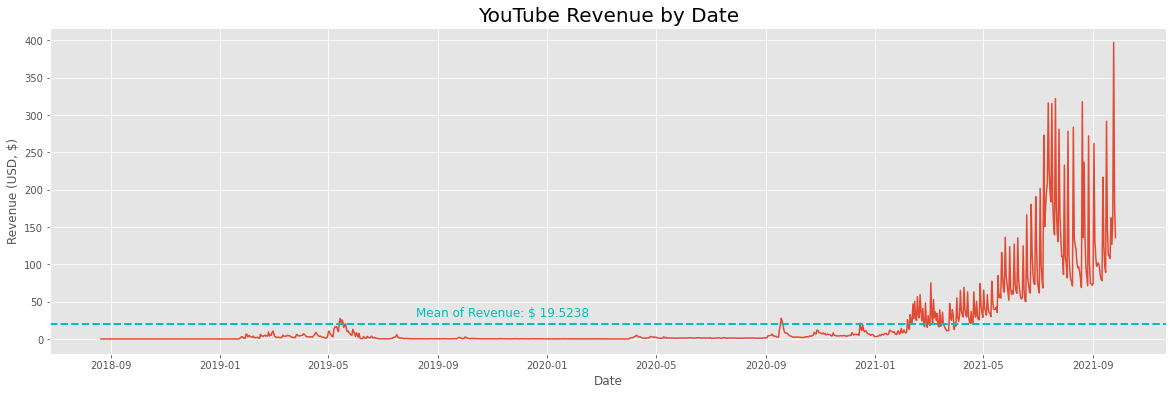

In [21]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='Date', y='Revenue')
plt.axhline(df.Revenue.mean(), color='c', linestyle='--', linewidth=2)
plt.annotate('Mean of Revenue: $ {}'.format(round(df.Revenue.mean(),4)), 
             (df.Date[350], 30), 
             fontsize=12, 
             color='c')
plt.title('YouTube Revenue by Date', fontsize=20)
plt.ylabel('Revenue (USD, $)')
plt.show()

In [22]:
df.corr()['Revenue'].sort_values(ascending=False).reset_index()[1:].style.bar(align='mid')

,index,Revenue
1,Watch_hours,0.984514
2,Unique_viewers,0.978712
3,Views,0.976545
4,Likes,0.964728
5,Dislikes,0.963711
6,Impressions,0.941682
7,Subscribers,0.907303
8,Shares,0.812967
9,Average_view_sec,0.646830
10,Average_views_per_viewer,0.583606


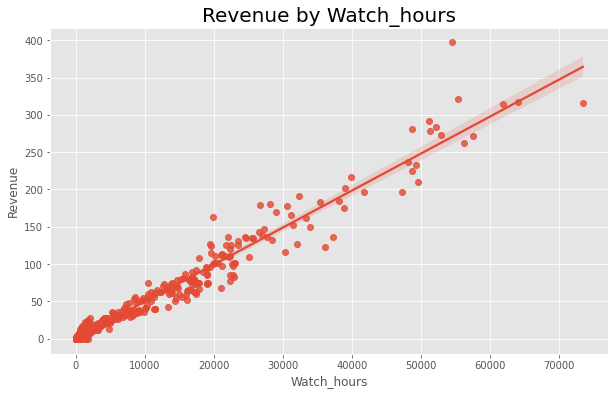

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Watch_hours', y='Revenue')
plt.title('Revenue by Watch_hours', fontsize=20)
plt.show()

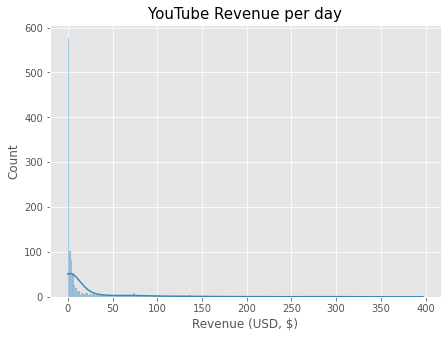

In [24]:
plt.figure(figsize=(7,5))
sns.histplot(df['Revenue'], kde=True)
plt.title('YouTube Revenue per day', fontsize=15)
plt.xlabel('Revenue (USD, $)')
plt.show()

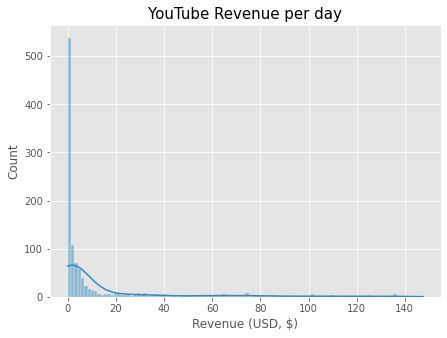

In [25]:
df = df[(df['Revenue'] <= 150)].reset_index(drop=True)
plt.figure(figsize=(7,5))
sns.histplot(df['Revenue'], kde=True)
plt.title('YouTube Revenue per day', fontsize=15)
plt.xlabel('Revenue (USD, $)')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


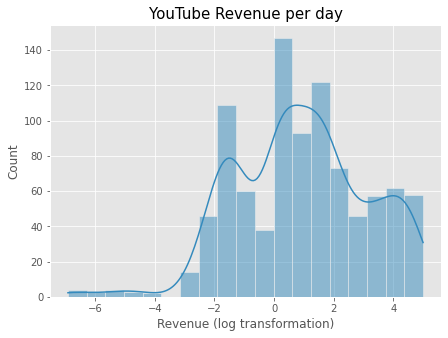

In [26]:
plt.figure(figsize=(7,5))
sns.histplot(np.log(df['Revenue']), kde=True)
plt.title('YouTube Revenue per day', fontsize=15)
plt.xlabel('Revenue (log transformation)')
plt.show()

In [27]:
df.describe().loc[['mean', 'std', 'min', '50%', 'max']]

,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
mean,1.614731,18141.957234,6.616151,6.165458e+05,87.180164,29.328480,1760.494995,28.441228,0.138308,380.376706,37299.474067,2710.063589,179.736124,13.229895
std,0.321479,33306.404588,2.259077,1.345969e+06,192.646676,54.560777,3747.027020,5.768121,0.429955,683.353242,74876.404616,5858.248179,56.878049,27.814934
min,1.000000,8.000000,3.520000,4.400000e+01,0.000000,-1.000000,-1.000000,10.950000,0.000000,-8.000000,8.000000,0.115200,51.000000,0.000000
50%,1.545200,3652.000000,6.140000,6.588600e+04,20.000000,5.000000,244.000000,27.800000,0.000000,111.000000,5792.000000,273.117200,174.000000,1.438000
max,2.615800,182161.000000,23.140000,6.615916e+06,2233.000000,284.000000,28326.000000,62.190000,4.000000,3665.000000,403655.000000,37234.927900,367.000000,147.525000


## **Feature Engineering**

In [28]:
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,0.0,0.0,4.0,44.58,0.0,4.0,37.0,0.9575,93,0.0


In [29]:
Subs = df.Subscribers.values.tolist()
Subs_accumulated = []
count = 0
for s in Subs:
    count += s
    Subs_accumulated.append(count)

df['Subs_accumulated'] = Subs_accumulated
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Subs_accumulated
0,2018-08-21,1.1538,13.0,7.38,122.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0,5.0
1,2018-08-22,1.1935,31.0,23.14,121.0,0.0,0.0,4.0,44.58,0.0,4.0,37.0,0.9575,93,0.0,9.0


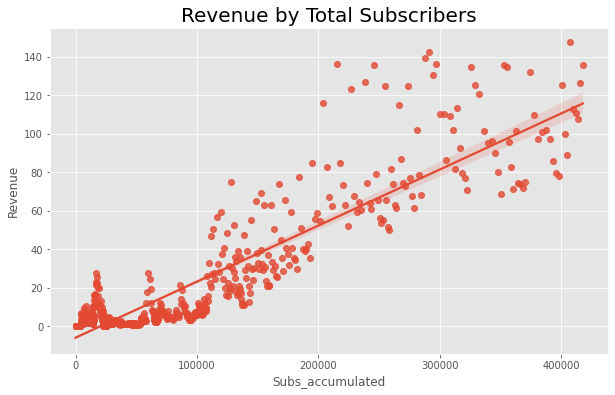

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Subs_accumulated', y='Revenue')
plt.title('Revenue by Total Subscribers', fontsize=20)
plt.show()

In [31]:
Video_pub = df.Videos_published.values.tolist()
Videos = []
count = 0
for v in Video_pub:
    count += v
    Videos.append(count)

df['Videos'] = Videos
df.head(2)

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Subs_accumulated,Videos
0,2018-08-21,1.1538,13.0,7.38,122.0,1.0,0.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0,5.0,1.0
1,2018-08-22,1.1935,31.0,23.14,121.0,0.0,0.0,4.0,44.58,0.0,4.0,37.0,0.9575,93,0.0,9.0,1.0


In [32]:
df.Videos_published.value_counts()

0.0    974
1.0    105
2.0     15
3.0      3
4.0      2
Name: Videos_published, dtype: int64

In [33]:
df['Videos_published'] = df.Videos_published.mask((df.Videos_published>0), 1).astype('int')

In [34]:
df = df[(df['Date'] > '20200901')].reset_index(drop=True)
df

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Shares,Dislikes,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue,Subs_accumulated,Videos
0,2020-09-02,1.7296,3565.0,5.69,82419.0,32.0,3.0,344.0,23.68,0,195.0,6166.0,305.4844,178,1.532,53582.0,60.0
1,2020-09-03,1.6349,9602.0,6.96,162769.0,40.0,11.0,1602.0,30.79,1,268.0,15698.0,910.9613,208,4.096,53850.0,61.0
2,2020-09-04,1.6092,9930.0,6.89,182250.0,55.0,13.0,997.0,28.86,0,277.0,15979.0,854.6027,192,4.233,54127.0,61.0
3,2020-09-05,1.6086,12425.0,6.86,231165.0,62.0,29.0,1115.0,28.39,0,342.0,19987.0,1038.3357,187,4.248,54469.0,61.0
4,2020-09-06,1.5435,14690.0,6.96,264697.0,62.0,27.0,1322.0,28.87,0,453.0,22674.0,1177.9374,187,4.607,54922.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2021-09-18,2.3484,113363.0,3.90,4995859.0,539.0,197.0,12117.0,38.75,0,2173.0,266218.0,20999.7588,283,112.856,409854.0,152.0
353,2021-09-19,2.3207,112822.0,3.72,5140093.0,441.0,178.0,11353.0,37.68,0,2222.0,261821.0,20159.2703,277,110.829,412076.0,152.0
354,2021-09-20,2.3670,98239.0,3.78,4509271.0,453.0,163.0,9536.0,37.28,0,1997.0,232530.0,17900.4225,277,107.846,414073.0,152.0
355,2021-09-22,2.2721,105872.0,4.04,4376635.0,399.0,195.0,10594.0,25.75,0,1809.0,240554.0,19512.3516,292,126.600,415882.0,152.0


In [35]:
df.corr()['Revenue'].sort_values(ascending=False).reset_index()['index'][1:14].values


array(['Unique_viewers', 'Views', 'Watch_hours', 'Impressions',
       'Dislikes', 'Likes', 'Subscribers', 'Subs_accumulated', 'Videos',
       'Shares', 'Average_views_per_viewer', 'Average_view_sec',
       'Average_viewed'], dtype=object)

In [36]:
features_chosen=[
                #  'Watch_hours', 
                #  'Unique_viewers', 
                #  'Views', 
                #  'Likes', 
                #  'Dislikes',
                #  'Impressions', 
                 'Subs_accumulated',
                #  'Subscribers', 
                  
                 'Shares',
                #  'Videos',
                 'Average_view_sec', 
                #  'Average_views_per_viewer', 
                 'Average_viewed'
                 ]


In [37]:
cols_remove = [
                    'Date',
                # 'Watch_hours', 
                #  'Unique_viewers', 
                #  'Views', 
                 'Dislikes',
                #  'Impressions', 
                 'Subscribers',  
                 'Shares',
                 'Videos',
                 'Average_view_sec', 
                 'Average_views_per_viewer', 
                 'Average_viewed',
                 'Videos_published',
                 'Click_rate', 
            #    'Subs_accumulated',
                 ]


df_new = df.copy()
df_new = df_new.drop(cols_remove, axis=1)
print('New Data Shape: ', df_new.shape)
df_new.head(2)

New Data Shape:  (357, 7)


,Unique_viewers,Impressions,Likes,Views,Watch_hours,Revenue,Subs_accumulated
0,3565.0,82419.0,344.0,6166.0,305.4844,1.532,53582.0
1,9602.0,162769.0,1602.0,15698.0,910.9613,4.096,53850.0


In [38]:
df_new.corr()['Revenue']

Unique_viewers      0.977431
Impressions         0.962151
Likes               0.944926
Views               0.975850
Watch_hours         0.972490
Revenue             1.000000
Subs_accumulated    0.896805
Name: Revenue, dtype: float64

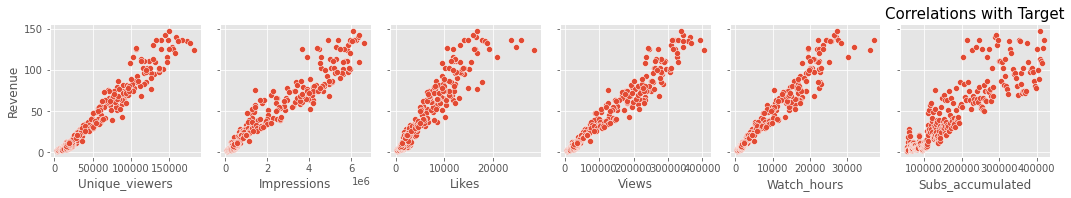

In [39]:
sns.pairplot(df_new, x_vars=df_new.columns.drop('Revenue'), y_vars=['Revenue'])
plt.title('Correlations with Target', fontsize=15)
plt.show()

## **Data Split**

In [40]:
x = df_new.drop(['Revenue'], axis=1)
y=df_new.drop(['Unique_viewers','Impressions','Likes','Views','Watch_hours','Subs_accumulated'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# split training and testing data
xtrain,xtest,ytrain,ytest= train_test_split(
                                            x,y,
                                            test_size=0.2,
                                            random_state=33
                                           )
stand= StandardScaler()
Fit_Transform = stand.fit_transform(xtrain)
Fit_Transform

array([[-0.71990072, -0.71205653, -0.776954  , -0.74758685, -0.77006595,
        -0.52134099],
       [ 0.24647642,  0.41671581,  0.06206084,  0.34185226,  0.27720613,
         1.08191012],
       [ 0.38906949,  0.5146008 ,  0.24965384,  0.51602836,  0.53873249,
         0.35913851],
       ...,
       [-0.82423234, -0.7554832 , -0.71923308, -0.80886469, -0.78936502,
        -0.83546108],
       [ 0.79858701,  0.45136255,  1.03981204,  0.68740068,  0.81259529,
        -0.05618827],
       [-0.71833403, -0.74114064, -0.66068757, -0.73547874, -0.74135863,
        -0.94369543]])

In [42]:
print("X_train:",xtrain.shape)
print("X_test:",xtest.shape)
print("Y_train:",ytrain.shape)
print("Y_test:",ytest.shape)

X_train: (285, 6)
X_test: (72, 6)
Y_train: (285, 1)
Y_test: (72, 1)



##**Linear Regression**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [45]:
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

In [46]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-4.9147311]
Coefficients: 
 [[ 6.65090963e-04  8.23820584e-06  7.62606163e-04 -3.74410474e-04
   3.07715524e-03  3.63198127e-05]]


In [47]:
ypred=regr.predict(xtest)

In [48]:
Accuracy=r2_score(ytest,ypred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 96.19


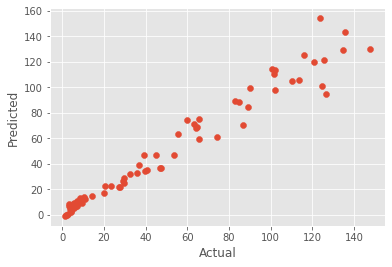

In [49]:
plt.scatter(ytest,ypred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

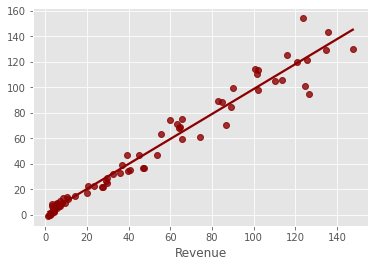

In [50]:
sns.regplot(x=ytest,y=ypred,ci=None,color ='darkred');

##**Support Vector Regression**

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
x = df_new.drop(['Revenue'], axis=1)
y=df_new.drop(['Unique_viewers','Impressions','Likes','Views','Watch_hours','Subs_accumulated'],axis=1)

In [53]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)
y=np.ravel(y)

In [54]:
from sklearn.svm import SVR

In [55]:
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

SVR()

In [56]:
ypred = regressor.predict(x)

In [57]:
Accuracy=r2_score(y,ypred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 97.24


##**ANN**

In [58]:
# Installing required libraries
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
TargetVariable=['Revenue']
Predictors=['Unique_viewers','Impressions','Likes','Views','Watch_hours','Subs_accumulated']
 
X=df_new[Predictors].values
y=df_new[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(249, 6)
(249, 1)
(108, 6)
(108, 1)


In [66]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=6, input_dim=6, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 500, verbose=1)

Epoch 1/500
13/13 [==============================] - 1s 4ms/step - loss: 1.0192
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 1.0111
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 0.9953
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.9627
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 0.9095
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 0.8213
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 0.7100
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5808
Epoch 9/500
13/13 [==============================] - 0s 7ms/step - loss: 0.4500
Epoch 10/500
13/13 [==============================] - 0s 5ms/step - loss: 0.3417
Epoch 11/500
13/13 [==============================] - 0s 3ms/step - loss: 0.2549
Epoch 12/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1976
Epoch 13/500
13/13 [=================

In [67]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Revenue']=y_test_orig
TestingData['PredictedRevenue']=Predictions
TestingData.head()

4/4 [==============================] - 0s 3ms/step


,Unique_viewers,Impressions,Likes,Views,Watch_hours,Subs_accumulated,Revenue,PredictedRevenue
0,36782.0,1330067.0,2938.0,78420.0,5553.7608,153841.0,32.466,27.111526
1,4459.0,97966.0,326.0,7254.0,400.2379,66697.0,2.134,1.219571
2,77404.0,3266651.0,6918.0,177361.0,13798.6015,261543.0,73.799,63.730762
3,76444.0,3647678.0,7099.0,190863.0,14897.1865,277495.0,67.963,67.119827
4,14817.0,337315.0,1794.0,22794.0,1671.2070,69641.0,11.915,8.242512


In [68]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Revenue']-TestingData['PredictedRevenue'])/TestingData['Revenue'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 83.28596899614118


,Unique_viewers,Impressions,Likes,Views,Watch_hours,Subs_accumulated,Revenue,PredictedRevenue,APE
0,36782.0,1330067.0,2938.0,78420.0,5553.7608,153841.0,32.466,27.111526,16.492557
1,4459.0,97966.0,326.0,7254.0,400.2379,66697.0,2.134,1.219571,42.850491
2,77404.0,3266651.0,6918.0,177361.0,13798.6015,261543.0,73.799,63.730762,13.642783
3,76444.0,3647678.0,7099.0,190863.0,14897.1865,277495.0,67.963,67.119827,1.240635
4,14817.0,337315.0,1794.0,22794.0,1671.2070,69641.0,11.915,8.242512,30.822394
